# 🚀 1.Import Libraries 🚀

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus = False) # 마이너스 폰트 설정
%matplotlib inline


import os
from glob import glob
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 🚀 2. Load Data🚀
- 총 <font color='green'>4277개</font>의 Train data
- 총 <font color='blue'>15개</font>의 Class
       
       transistor, capsule, wood, bottle, screw, cable,
       carpet, hazelnut, pill, metal_nut, zipper, leather,
       toothbrush, tile, grid
       

In [6]:
tr_df = pd.read_csv('train_df.csv')
tr_df

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good
...,...,...,...,...,...
4272,4272,14272.png,transistor,good,transistor-good
4273,4273,14273.png,transistor,good,transistor-good
4274,4274,14274.png,grid,good,grid-good
4275,4275,14275.png,zipper,good,zipper-good


In [7]:
classList =tr_df['class'].unique()
print('class names : ', classList,'\n')

print('class 개수 : ', len(classList))

class names :  ['transistor' 'capsule' 'wood' 'bottle' 'screw' 'cable' 'carpet'
 'hazelnut' 'pill' 'metal_nut' 'zipper' 'leather' 'toothbrush' 'tile'
 'grid'] 

class 개수 :  15


# 🚀 3. Preprocessing 🚀
- Label별 개수 확인
- Label별로 숫자를 계산하여 DF 생성
- Class별로 DF를 생성하여 dict에 저장 (총 15개의 DF)

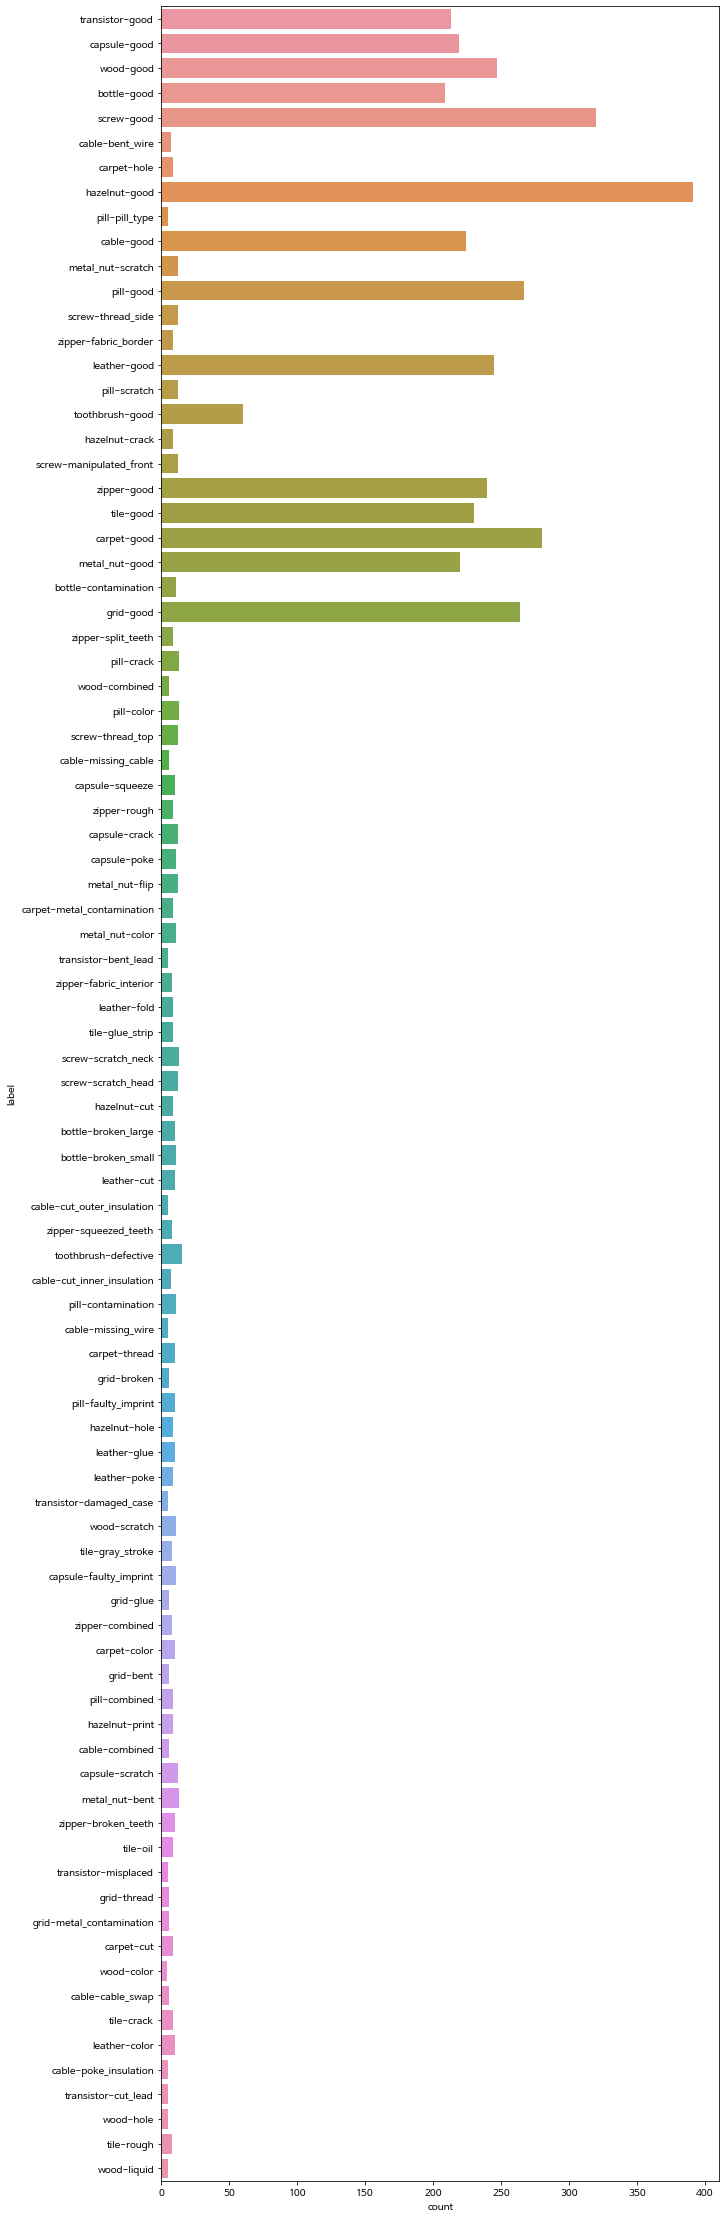

In [8]:
# train 데이터의 label별 개수 확인
plt.figure(figsize=(10,40))
sns.countplot(data=tr_df, y='label',)

In [9]:
labelCount = tr_df[['class','label']].groupby('label').count().rename(columns={'class':'count'})
labelCount

,count
label,
bottle-broken_large,10
bottle-broken_small,11
bottle-contamination,11
bottle-good,209
cable-bent_wire,7
...,...
zipper-fabric_interior,8
zipper-good,240
zipper-rough,9


In [11]:
anomaly_dict = {}

for className in classList:
    df = pd.DataFrame(labelCount[labelCount.index.str.contains(className)]).sort_values(by='count', ascending=False)
    anomaly_dict[className] = df


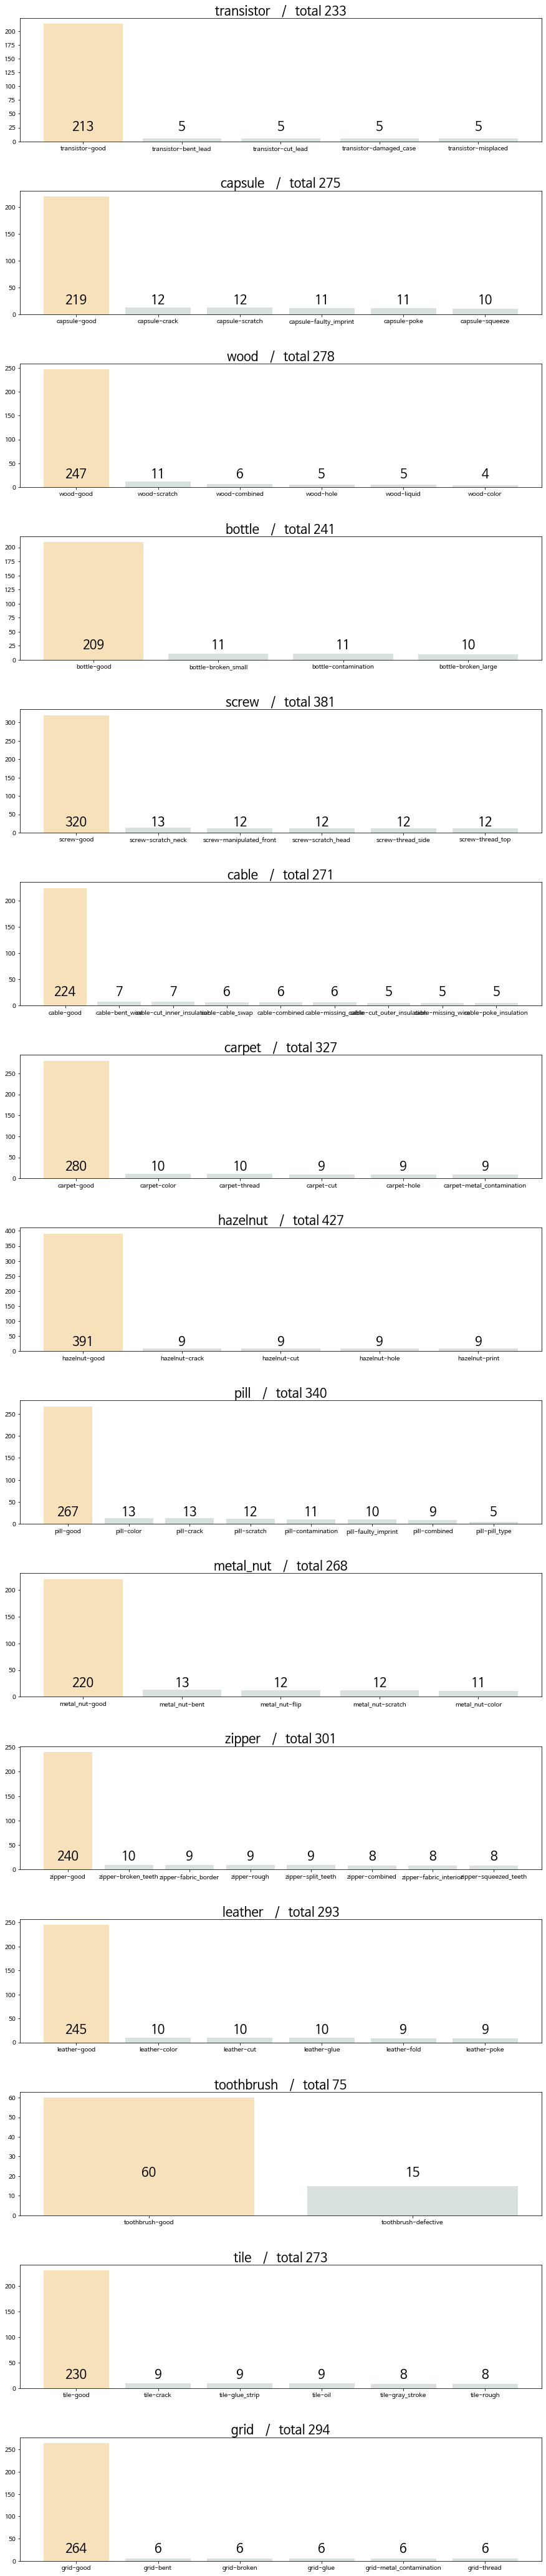

In [15]:
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(15, 75))
fig.subplots_adjust(hspace = 0.4)  # 서브 플롯 간 간격을 변경할 수 있습니다b
axs = axs.ravel() # flattening

for i , (className, df) in enumerate(anomaly_dict.items()):
    colors = ['#d4dddd' for i in range(len(df.index))]
    colors[0] = '#F5DEB3'
    axs[i].bar(df.index, df.iloc[:,0], color=colors, alpha=0.9)
    axs[i].set_title('{}    /   total {}'.format(className,df[df.index.str.contains(className)].sum()[0]), fontsize=20)

    for j, _ in enumerate(df.iloc[:,0]):
        axs[i].text(j, 20, df.iloc[:,0][j], ha='center', fontsize=20)

Text(0.5, 1.0, 'Class 종류')

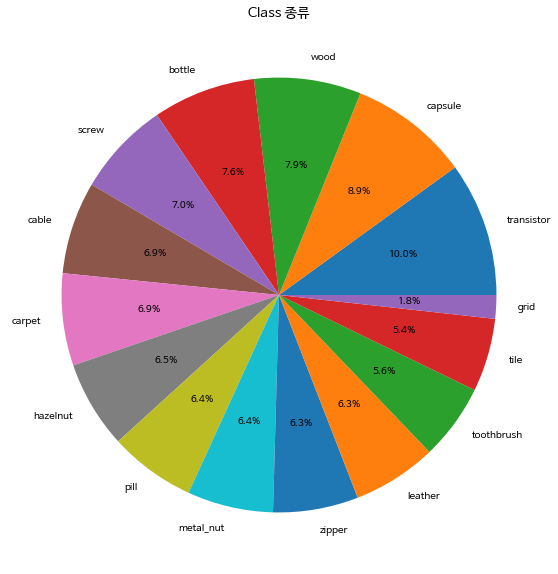

In [19]:
plt.figure(figsize=(10,10))
plt.pie(tr_df['class'].value_counts(), labels=classList, autopct='%.1f%%')
plt.title('Class 종류', fontsize=14)

# 🚀 4. Visualization per Class 🚀
- 클래스별 이미지 시각화
- 각 label 별 임의의 8개의 이미지 시각화

In [285]:
def visualize_image(cat_class:str, num:int=8):
    img_list = list(tr_df.loc[tr_df['class']==cat_class].sample(num)['file_name'])
    fig, axs = plt.subplots(2,4, figsize=(12,7))
    fig.suptitle(cat_class , fontsize=15)

    axs = axs.flatten()

    for img_code, ax in zip(img_list, axs):
        image = cv2.imread(os.path.join(train_path, str(img_code)))
        cat_label =  str(tr_df[tr_df['file_name']==str(img_code)]['label'].item())
        # print(cat_label)
        ax.imshow(image)
        ax.set_title(str(img_code + f' ({cat_label})'))
    plt.show()
    print('\n')

In [286]:
for i in classList:
    visualize_image(i)

Output hidden; open in https://colab.research.google.com to view.